# Part I - (Ford Gobike Data )
## by (Abdulrahman AlShawi)

## Introduction

> This data set includes information about individual rides made in a bike-sharing system covering the greater San Francisco Bay area.

## Preliminary Wrangling

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

import warnings
warnings.simplefilter("ignore")

> Load in your dataset and describe its properties through the questions below. Try and motivate your exploration goals through this section.


In [2]:
# load the data set 
df = pd.read_csv('201902-fordgobike-tripdata.csv')

# preview of the set
df.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes


In [3]:
# overview of the dataset

print("shape:",df.shape, "\n")
print(df.info())

shape: (183412, 16) 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             183412 non-null  int64  
 1   start_time               183412 non-null  object 
 2   end_time                 183412 non-null  object 
 3   start_station_id         183215 non-null  float64
 4   start_station_name       183215 non-null  object 
 5   start_station_latitude   183412 non-null  float64
 6   start_station_longitude  183412 non-null  float64
 7   end_station_id           183215 non-null  float64
 8   end_station_name         183215 non-null  object 
 9   end_station_latitude     183412 non-null  float64
 10  end_station_longitude    183412 non-null  float64
 11  bike_id                  183412 non-null  int64  
 12  user_type                183412 non-null  object 
 13  member_birth_year        175147 non-n

In [4]:
# fix the datatypes

# change the start_time and end_time columns to date type
df[['start_time', 'end_time']] = df[['start_time', 'end_time']].apply(pd.to_datetime)


# validate 

df.dtypes

duration_sec                        int64
start_time                 datetime64[ns]
end_time                   datetime64[ns]
start_station_id                  float64
start_station_name                 object
start_station_latitude            float64
start_station_longitude           float64
end_station_id                    float64
end_station_name                   object
end_station_latitude              float64
end_station_longitude             float64
bike_id                             int64
user_type                          object
member_birth_year                 float64
member_gender                      object
bike_share_for_all_trip            object
dtype: object

In [5]:
# I will add a column called customer age 

df['customer_age'] = 2024 - df['member_birth_year']

df.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,customer_age
0,52185,2019-02-28 17:32:10.145,2019-03-01 08:01:55.975,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No,40.0
1,42521,2019-02-28 18:53:21.789,2019-03-01 06:42:03.056,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No,NaN
2,61854,2019-02-28 12:13:13.218,2019-03-01 05:24:08.146,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No,52.0
3,36490,2019-02-28 17:54:26.010,2019-03-01 04:02:36.842,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No,35.0
4,1585,2019-02-28 23:54:18.549,2019-03-01 00:20:44.074,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes,50.0


In [6]:
# use .describe() function to get a describtion of the datest

df.describe()

,duration_sec,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bike_id,member_birth_year,customer_age
count,183412.000000,183215.000000,183412.000000,183412.000000,183215.000000,183412.000000,183412.000000,183412.000000,175147.000000,175147.000000
mean,726.078435,138.590427,37.771223,-122.352664,136.249123,37.771427,-122.352250,4472.906375,1984.806437,39.193563
std,1794.389780,111.778864,0.099581,0.117097,111.515131,0.099490,0.116673,1664.383394,10.116689,10.116689
min,61.000000,3.000000,37.317298,-122.453704,3.000000,37.317298,-122.453704,11.000000,1878.000000,23.000000
25%,325.000000,47.000000,37.770083,-122.412408,44.000000,37.770407,-122.411726,3777.000000,1980.000000,32.000000
50%,514.000000,104.000000,37.780760,-122.398285,100.000000,37.781010,-122.398279,4958.000000,1987.000000,37.000000
75%,796.000000,239.000000,37.797280,-122.286533,235.000000,37.797320,-122.288045,5502.000000,1992.000000,44.000000
max,85444.000000,398.000000,37.880222,-121.874119,398.000000,37.880222,-121.874119,6645.000000,2001.000000,146.000000


### What is the structure of your dataset?

> The dataset containts 183,412 data trips for fordgobike with 16 features:
<ul> 
    <li>duration_sec</li>
    <li>start_time</li>
    <li>end_time</li>
    <li>start_station_id</li>
    <li>start_station_name</li>
    <li>start_station_latitude</li>
    <li>start_station_longitude</li>
    <li>end_station_id</li>
    <li>end_station_name</li>
    <li>end_station_latitude</li>
    <li>end_station_longitude</li>
    <li>bike_id</li>
    <li>user_type</li>
    <li>member_birth_year</li>
    <li>member_gender</li>
    <li>bike_share_for_all_trip</li>

</ul>

### What is/are the main feature(s) of interest in your dataset?

> the features im interested in epxloring are:
<ul>
    <li>duration_sec</li>
    <li>start_station_id</li>
    <li>end_station_id</li>
    <li>member_gender</li>
    <li>member_birth_year</li>
    
</ul>

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> I expect the customer age and gender will have a big impact in the trip duration

## Univariate Exploration

> Now I will i will investigate the distribution of some varibales individually

#### What is the duration of most of the trips ?

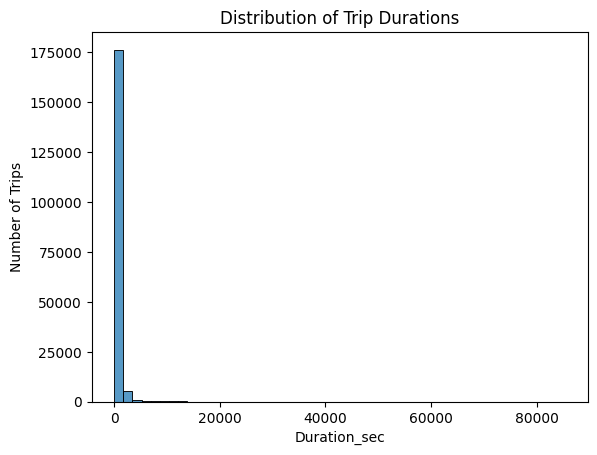

In [7]:
# distribution of duration_sec

# plot a histogram

sns.histplot(df['duration_sec'] ,bins = 50, color= "tab:blue")
# Add labels

plt.title('Distribution of Trip Durations')
plt.xlabel('Duration_sec')
plt.ylabel('Number of Trips');

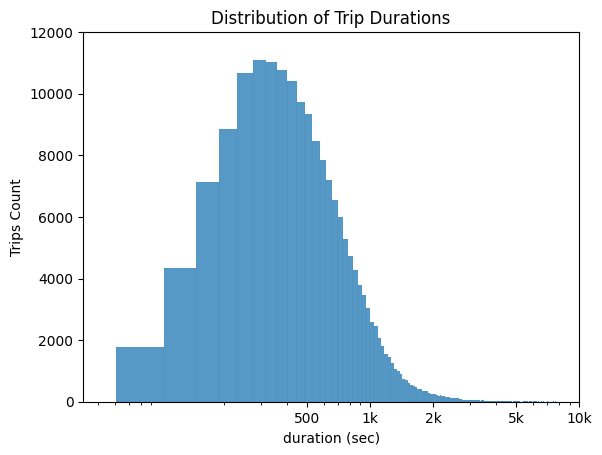

In [8]:
# because there is a long tail in the distribution I will use plt.xscale('log') to put it in a log scale

sns.histplot(df['duration_sec'] , bins = 2000, color= "tab:blue")
plt.title('Distribution of Trip Durations')
plt.xlabel('duration (sec)')
plt.ylabel('Trips Count')
plt.xscale('log')
plt.xticks([500, 1e3, 2e3, 5e3, 1e4], [500, '1k', '2k', '5k', '10k'])
plt.axis([0, 10000, 0, 12000]);

> As we can see in the histogram trip duration distribution mostly lays on vlaues less than 2000 seconds and the peak is around 500 seconds

#### Which age group has the most trips ?

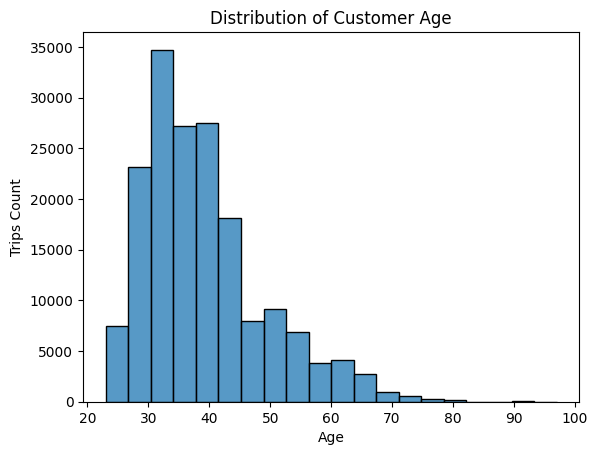

In [9]:
#### What is the duration of most of the trips ?# customer_age distribution
# filter to remove outlier
df_age_no_outliers = df[df['customer_age'] <100 ]
# plot a histogram

sns.histplot(df_age_no_outliers['customer_age'] ,bins = 20, color= "tab:blue")
# Add labels

plt.title('Distribution of Customer Age')
plt.xlabel('Age')
plt.ylabel('Trips Count');

> As we can see in the histogram customer age with the highest bike trips is between 30-40

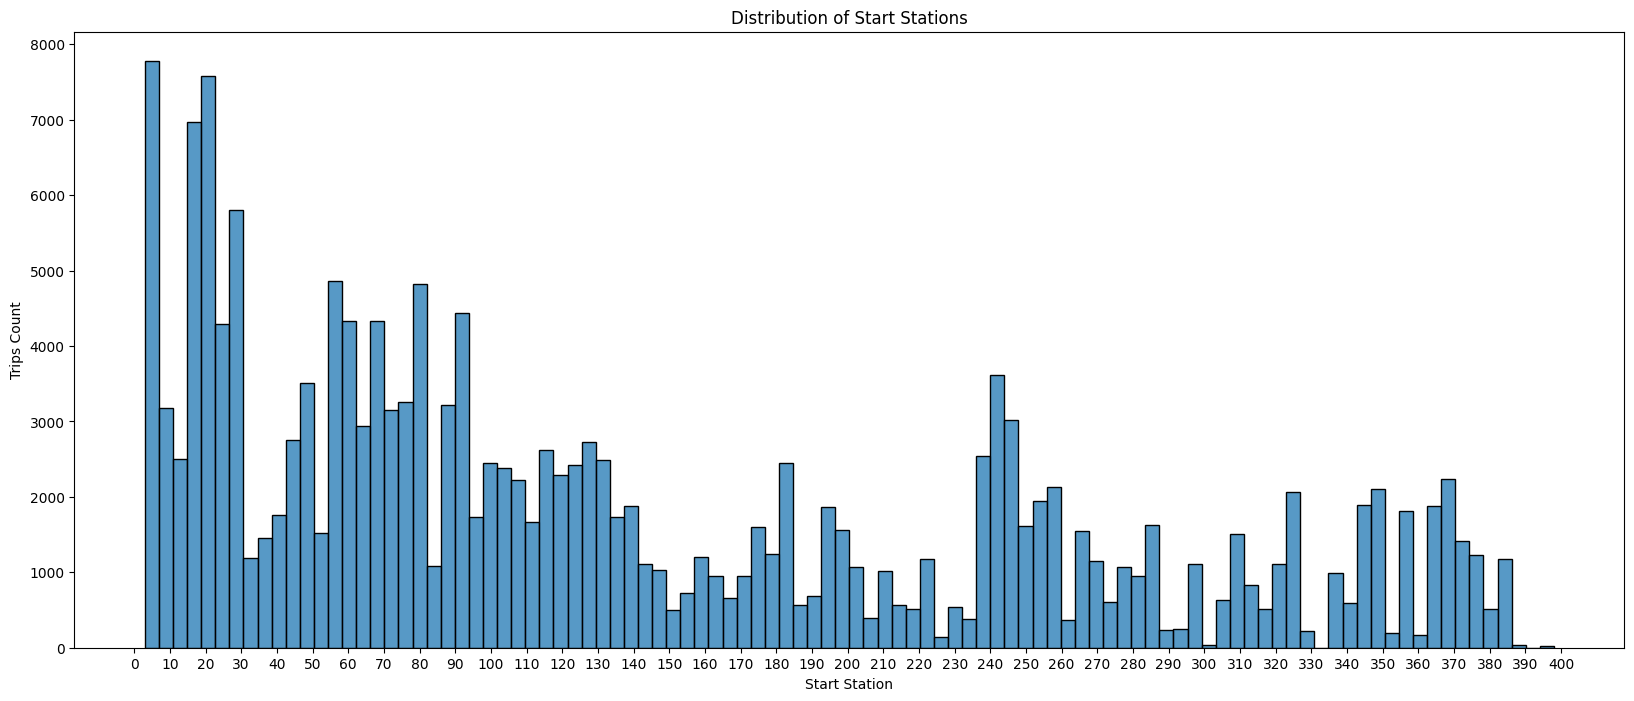

In [10]:
# start station distribution

# plot a histogram
plt.figure(figsize=[20, 8])
sns.histplot(df['start_station_id'] ,bins = 100, color= "tab:blue")
plt.xticks(range(0, 402, 10))

# Add labels

plt.title('Distribution of Start Stations')
plt.xlabel('Start Station')
plt.ylabel('Trips Count');

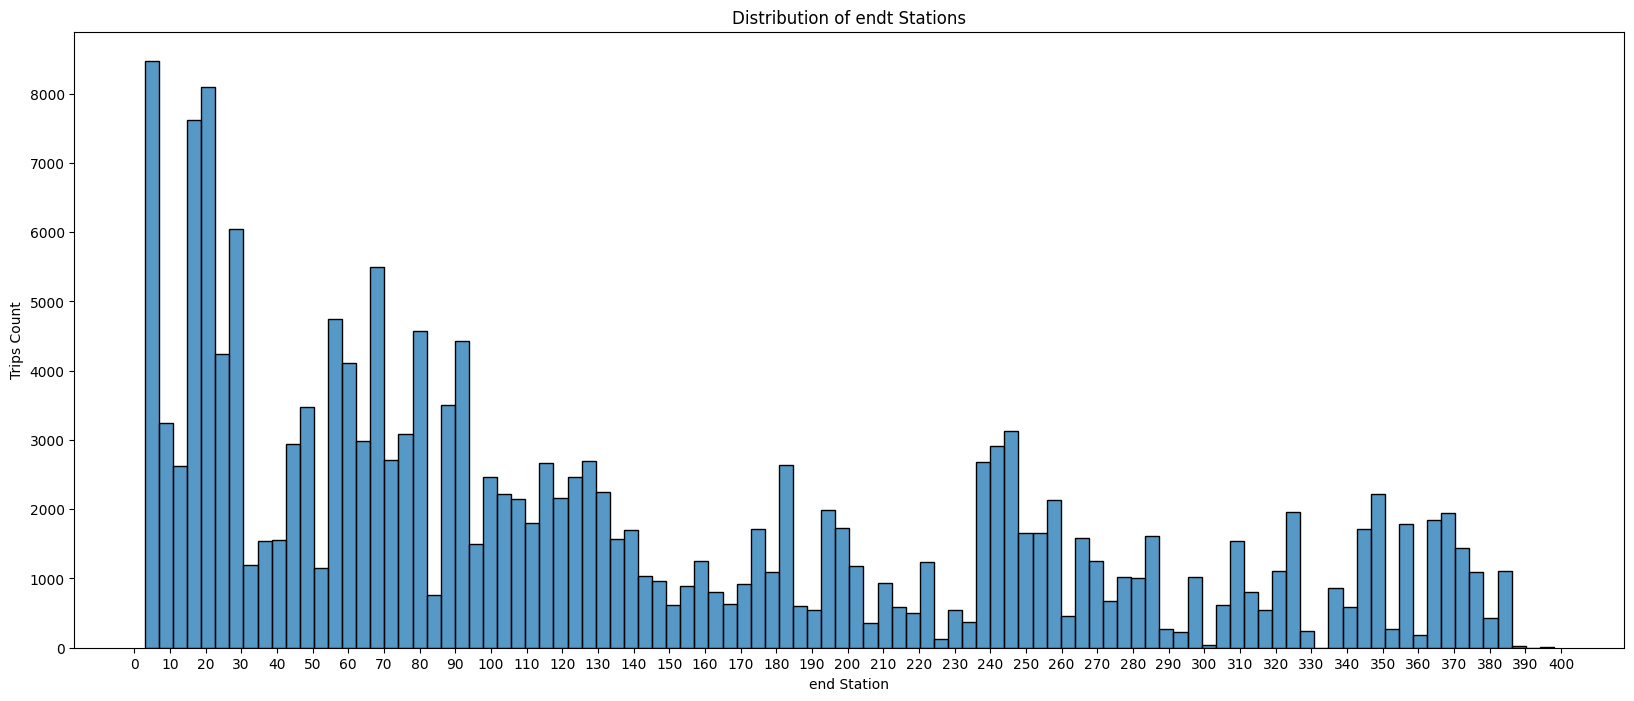

In [11]:
# end station distribution

# plot a histogram
plt.figure(figsize=[20, 8])
sns.histplot(df['end_station_id'] ,bins = 100, color= "tab:blue")
plt.xticks(range(0, 402, 10))

# Add labels

plt.title('Distribution of endt Stations')
plt.xlabel('end Station')
plt.ylabel('Trips Count');

> As we can see the distribution in the start station and end station are similar

#### Which gender has the most trips ?

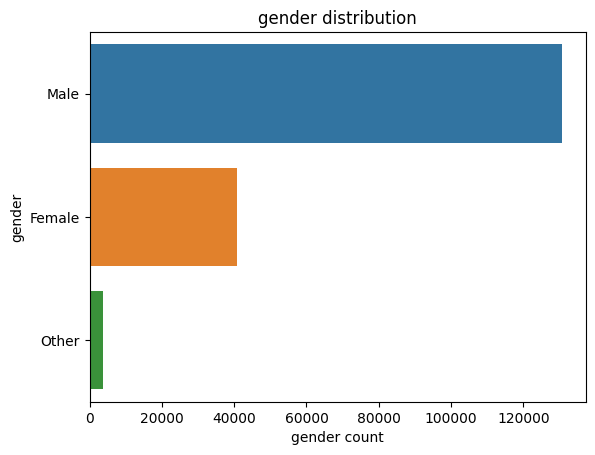

In [12]:
# distribution of gender

sns.barplot(data=df,x= df['member_gender'].value_counts(), y=df['member_gender'].value_counts().index)

plt.xlabel('gender count')
plt.ylabel('gender')
plt.title('gender distribution')
plt.show()

> As we can clearly see that male has the highest number of trips

#### Which user type has the most trips ?

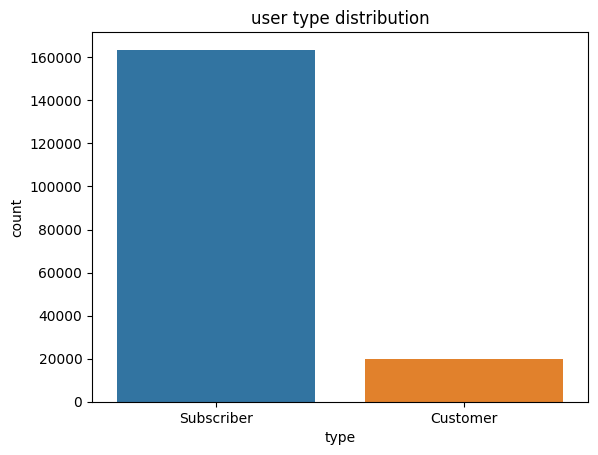

In [13]:
#### Which gender has the most trips ?# distribution of user type

sns.barplot(data=df, x=df['user_type'].value_counts().index, y= df['user_type'].value_counts())

plt.xlabel('type')
plt.ylabel('count')
plt.title('user type distribution')
plt.show()

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> I was surprised by the gender distribution because there is a huge gap between male and other genders, Also I added an age column to find the ages of customers (current year - birth year), I found out that many of the customers are between 30 to 40 years of age

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> yes there is an issue with age column where age is more than 100 years which is impossible so I filtered it out when I did the age distribution

## Bivariate Exploration

### how is duration related to other variables ?

> I will start with duration variable and see how it correlated with other variables

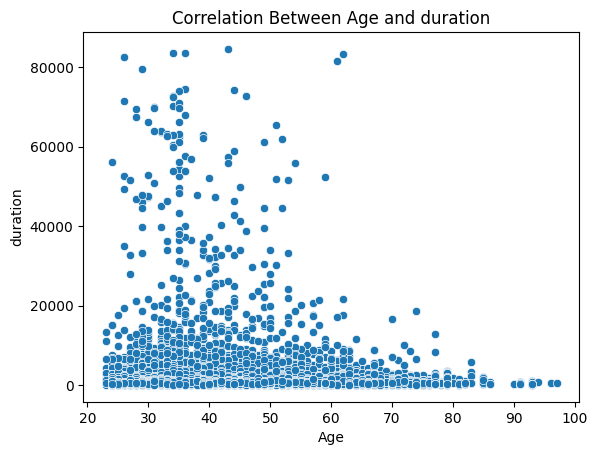

In [14]:
# remove age outliers 
df_age_no_outliers = df[df['customer_age'] <100 ]

# Create scatter plot
sns.scatterplot(x=df_age_no_outliers['customer_age'], y=df_age_no_outliers['duration_sec'])
# Add labels and title
plt.xlabel('Age')
plt.ylabel('duration')
plt.title('Correlation Between Age and duration');

> by looking at the chart we can see that most of the users age is less than 60 and the age of the users with long duration trips is mostly between 20 - 40

In [15]:
# I will create a copy of the df to modify it to create a clustered bar chart that compares gender and with age , above 30 or below

df_ageGroup = df.copy()
# Define a function to group age
def Grouped_age(age):
    if age < 30:
        return 'below 30'
    elif age >=30:
        return 'over 30'
    else:
        ""

# Apply the function to create the 'age_group' column
df_ageGroup['age_group'] = df_ageGroup['customer_age'].apply(lambda x: Grouped_age(x))

df_ageGroup.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,customer_age,age_group
0,52185,2019-02-28 17:32:10.145,2019-03-01 08:01:55.975,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No,40.0,over 30
1,42521,2019-02-28 18:53:21.789,2019-03-01 06:42:03.056,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No,NaN,None
2,61854,2019-02-28 12:13:13.218,2019-03-01 05:24:08.146,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No,52.0,over 30
3,36490,2019-02-28 17:54:26.010,2019-03-01 04:02:36.842,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No,35.0,over 30
4,1585,2019-02-28 23:54:18.549,2019-03-01 00:20:44.074,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes,50.0,over 30


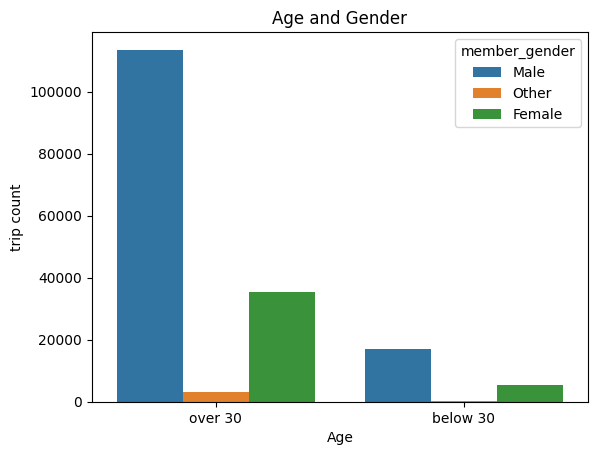

In [16]:
# plotting a clustered chart
sns.countplot(data=df_ageGroup , x='age_group', hue='member_gender')

# add labels
plt.xlabel('Age')
plt.ylabel('trip count')
plt.title('Age and Gender');

> by looking at the clustered chart we can see that the gap between male and other genders is much bigger where age is over 30

> Now I will take a look at the start station and end station and how its releated to duration

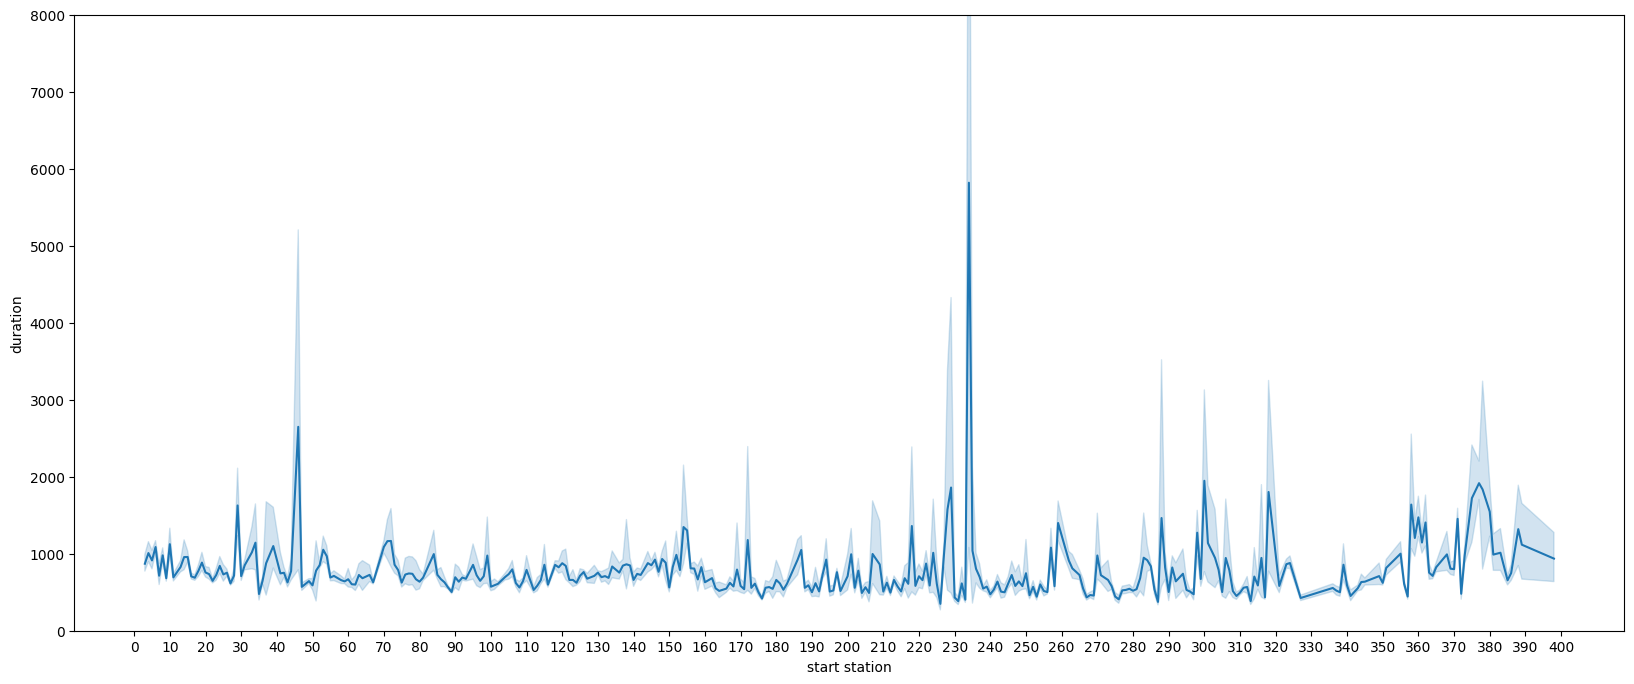

In [17]:
# Create the line plot
plt.figure(figsize = [20, 8])
sns.lineplot(x=df['start_station_id'], y=df['duration_sec'])
plt.xticks(range(0, 401, 10))
plt.ylim(0, 8000)
# Add labels
plt.xlabel('start station')
plt.ylabel('duration');


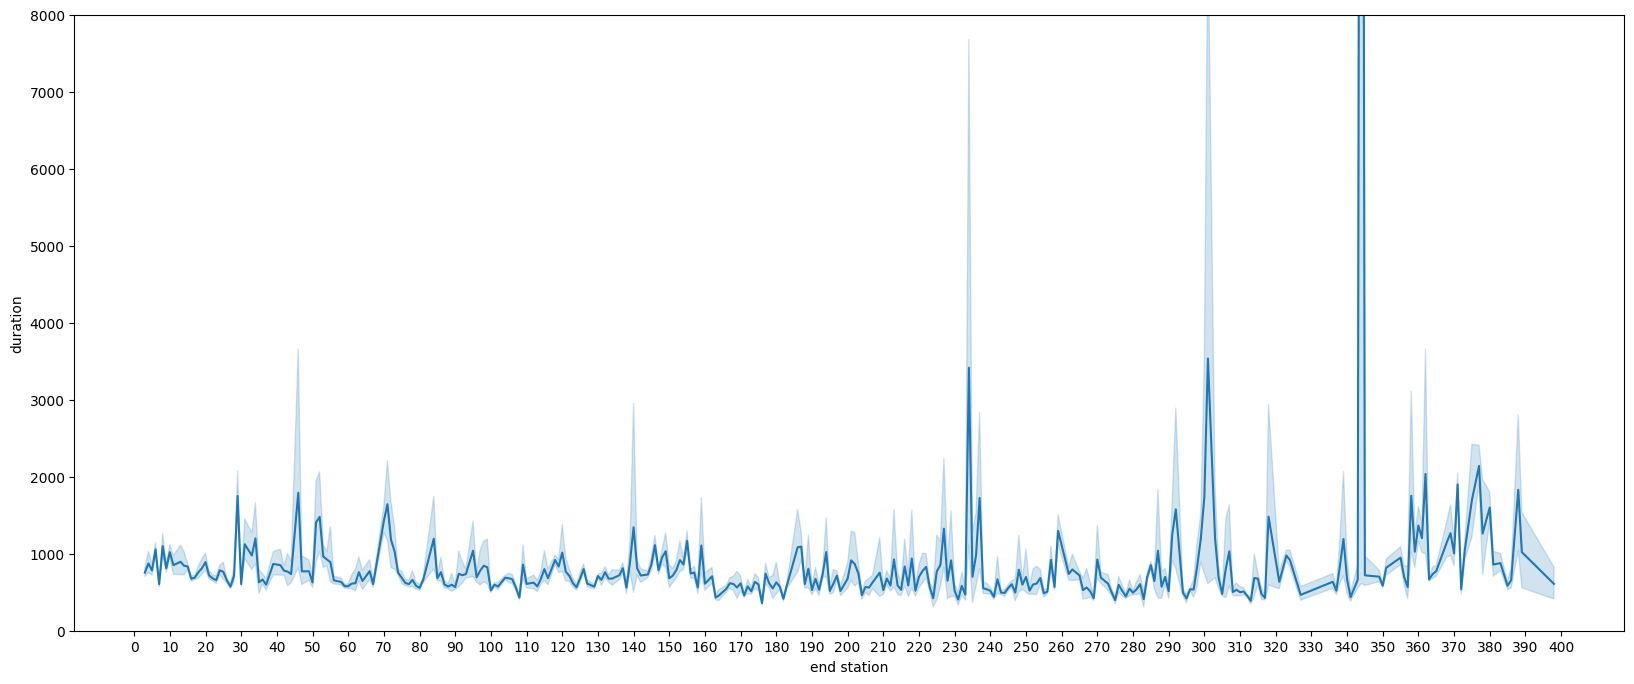

In [18]:
# Create the line plot
plt.figure(figsize = [20, 8])
sns.lineplot(x=df['end_station_id'], y=df['duration_sec'])
plt.xticks(range(0, 401, 10))
plt.ylim(0, 8000)
# Add labels
plt.xlabel('end station')
plt.ylabel('duration');



> Now I will create a boxplot to sea the duration dependency on Gender

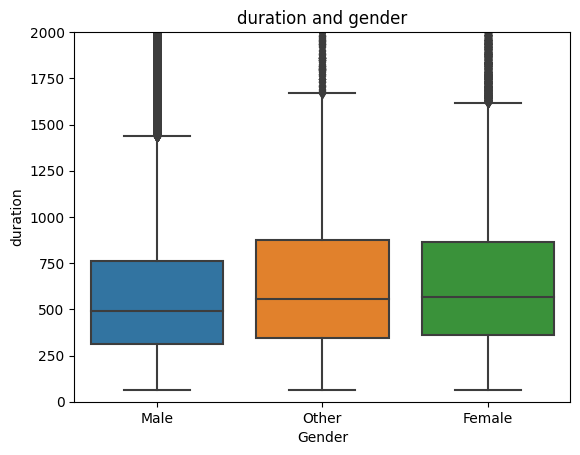

In [19]:
# Create boxplot
sns.boxplot(x=df['member_gender'], y=df['duration_sec'])
plt.ylim([0, 2000])
# Add labels and title
plt.xlabel('Gender')
plt.ylabel('duration')
plt.title('duration and gender');

> As we can see in the box plot female has more long rides than male

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> I observed by looking at the age and duration relationship that the older the customer the shorter trip duration will be
### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> I was interested by the gender and duration relationship where female has more long rides than other genders 

## Multivariate Exploration

> How is age, duration and gender related to each other ?

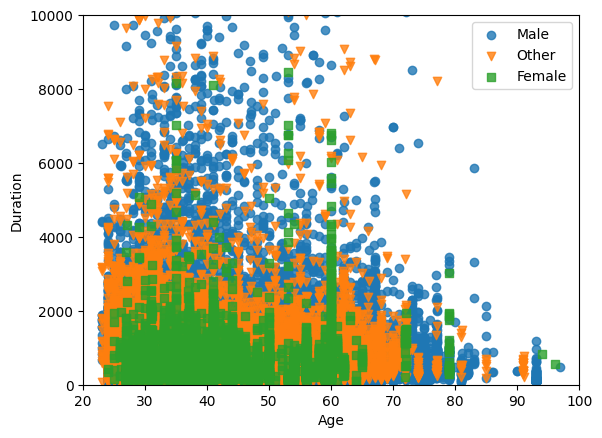

In [20]:

# assign markers 
gender_marker = [['Male', 'o'],['Female', 'v'],['Other', 's']]

for gender, marker in gender_marker:
    df_gender = df[df['member_gender'] == gender]
    sns.regplot(data= df_gender , x='customer_age', y='duration_sec', x_jitter=0.04, fit_reg=False, marker=marker);
    
plt.legend(['Male','Other','Female'])
plt.axis([20, 100, 0, 10000 ])
plt.xlabel('Age')
plt.ylabel('Duration');

> Since the scatter plot is not clear I will devide it to e scatter plots

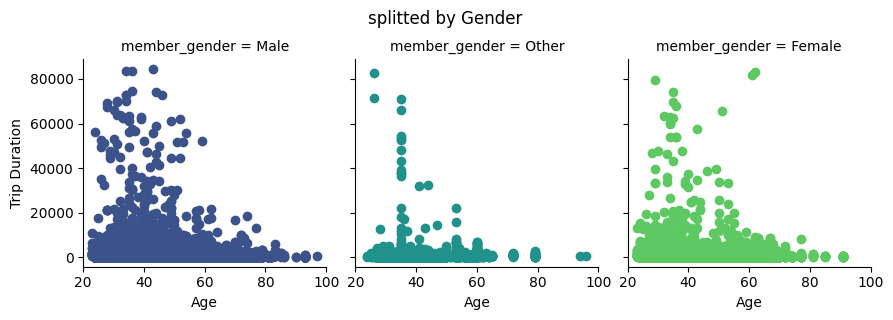

In [21]:
# Create a FacetGrid
g = sns.FacetGrid(df, col='member_gender', hue='member_gender', palette='viridis')

# Map scatter plot
g.map(plt.scatter, 'customer_age', 'duration_sec')

g.set(xlim=(20, 100))
g.set_axis_labels('Age', 'Trip Duration')
g.fig.suptitle('splitted by Gender', y=1.05);


> As we can see its much clear now

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> I obsereved the relation between 3 variables duration, gender, and age.

### Were there any interesting or surprising interactions between features?

> surprisingly, the male and female distribution are similar

## Conclusions

>I really enjoyed exploring these variables and here are some of the findings :

<ul> 
    <li> Most of the durations are less than 2000 seconds </li>
    <li> age with the highest bike trips is between 30-40 </li>
    <li> Male gender has the highest number of trips </li>
    <li> female has more long rides than male </li>
 

</ul>



